In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
from random import shuffle, randint

from sklearn.cross_validation import train_test_split
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [63]:
#read in csv file
data = pd.read_csv("glass.csv", header=None)
trainPercent = 30 #must be between 0 and 100
validationPercent = 40
numberRowsOfBuildingWindowsFP = 70
numberRowsOfBuildingWindowsNFP = 76
numberRowsOfVehicleWindowsFP = 17
numberRowsOfVehicleWindowsNFP = 0
numberRowsOfContainers = 13
numberRowsOfTableware = 9
numberRowsOfLamps = 29
data.head() #look at first 5 rows of the data

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [64]:
dataInputs= data.loc[:,0:9]
dataInputs.head()

,0,1,2,3,4,5,6,7,8,9
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [65]:
y1=[]
y2=[]
y3=[]
y5=[]
y6=[]
y7=[]
for i in range(0,numberRowsOfBuildingWindowsFP):
    y1.append([1,0,0,0,0,0]);#BuildingWindowsFP
for i in range(0,numberRowsOfBuildingWindowsNFP):
    y2.append([0,1,0,0,0,0]);#BuildingWindowsNFP
for i in range(0,numberRowsOfVehicleWindowsFP):
    y3.append([0,0,1,0,0,0]);#VehicleWindowsFP
for i in range(0,numberRowsOfContainers):
    y5.append([0,0,0,1,0,0]);#Containers
for i in range(0,numberRowsOfTableware):
    y6.append([0,0,0,0,1,0]);#Tableware
for i in range(0,numberRowsOfLamps):
    y7.append([0,0,0,0,0,1]);#Lamps
expectedOutput=np.concatenate([y1,y2,y3,y5,y6,y7])

In [66]:
#Hint: use train_test_split
inputTrain, inputTest, expectedOutputTrain, expectedOutputTest = train_test_split(dataInputs, expectedOutput, train_size = trainPercent/100, random_state=42)
validateTest, inputTrain, validateOutputTest, expectedOutputTrain = train_test_split(inputTrain, expectedOutputTrain, train_size = validationPercent/100, random_state=42)
#inputTest.head()
print(validateTest.shape)
print(validateOutputTest.shape)
print(inputTrain.shape)
print(expectedOutputTrain.shape)
print(inputTest.shape)
print(expectedOutputTest.shape)

def getClassCountTotals(output):
    d = collections.OrderedDict()
    for a in output:
        t = tuple(a)
        if t in d:
            d[t] += 1
        else:
            d[t] = 1

    result = []
    for (key, value) in d.items():
        result.append(list(key) + [value])

    B = np.asarray(result)
    print(B)
    for Bi in B:
        print("B", B)
        if Bi[0] == 1:
            buildingWindowsFPTotal = Bi[6]
        elif Bi[1] == 1:
            buildingWindowsNFPTotal = Bi[6]
        elif Bi[2] == 1:
            vehicleWindowsFPTotal = Bi[6]
        elif Bi[3] == 1:
            containersTotal = Bi[6]
        elif Bi[4] == 1:
            tablewareTotal = Bi[6]
        elif Bi[5] == 1:
            lampTotal = Bi[6]
            
    return buildingWindowsFPTotal, buildingWindowsNFPTotal, vehicleWindowsFPTotal, containersTotal, tablewareTotal, lampTotal
print(expectedOutputTest)
print("ValidateTest",validateOutputTest)
buildingWindowsFPTotal, buildingWindowsNFPTotal, vehicleWindowsFPTotal, containersTotal, tablewareTotal, lampTotal = getClassCountTotals(expectedOutputTest)
print("validate output test", validateOutputTest)
validationCounts = getClassCountTotals(validateOutputTest)
print(buildingWindowsFPTotal)
print(buildingWindowsNFPTotal)
print(vehicleWindowsFPTotal)
print(containersTotal)
print(tablewareTotal)
print(lampTotal)

(25, 10)
(25, 6)
(39, 10)
(39, 6)
(150, 10)
(150, 6)
[[1 0 0 0 0 0]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 1 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [

In [67]:
#Build our least squares classifier for 2 classes
D = inputTrain.shape[1] + 1 #num of attributes, +1 is for the intercept (column of 1s)
K = expectedOutput.shape[1]

In [68]:
expectedOutputTrain = np.asarray(expectedOutputTrain)
expectedOutputTest = np.asarray(expectedOutputTest)
inputTrain = np.asarray(inputTrain)
inputTest = np.asarray(inputTest)
validateTest = np.asarray(validateTest)
validateOutputTest = np.asarray(validateOutputTest)

In [69]:
sum1 = 0
sum2 = 0
def createWeightMatrix(x, y, lmbda):
    numRows = x.shape[0]
    new_col = np.ones((numRows,1))
    augmentedX = np.c_[new_col, x]
    sum1 = np.dot(augmentedX.T, augmentedX) + lmbda
    sum2 = np.dot(augmentedX.T, y)
    W = np.dot(np.linalg.inv(sum1), sum2)
    return W

In [70]:
def classificationTest(xTest, yTest, W, isValidating):  
    returnVals = []
    total = yTest.shape[0]
    predicted = np.zeros((total, K))
    i=0
    buildingWindowsFPCorrect=buildingWindowsNFPCorrect=vehicleWindowsFPCorrect=containersCorrect=tablewareCorrect=lampCorrect=totalCorrect=0
    correctPredictionCol = [0]*total
    for i in range(total):      
        x = xTest[i]        
        x = np.append(1,x)         
        x = x.reshape(1,D)        
        values = np.dot(W.T,x.T)
        values = values.T
        values = values.flatten()
        maxIndex = np.argmax(values)
        if yTest[i][maxIndex] == 1:
            if maxIndex == 0:
                buildingWindowsFPCorrect += 1
            elif maxIndex == 1:
                buildingWindowsNFPCorrect += 1
            elif maxIndex == 2:
                vehicleWindowsFPCorrect += 1
            elif maxIndex == 3:
                containersCorrect +=1
            elif maxIndex == 4:
                tablewareCorrect +=1
            elif maxIndex == 5:
                lampCorrect +=1
            correctPredictionCol[i] = 1
        predicted[i][maxIndex] = 1
    totalCorrect = buildingWindowsFPCorrect + buildingWindowsNFPCorrect + vehicleWindowsFPCorrect + containersCorrect + tablewareCorrect + lampCorrect
    print(totalCorrect)
    totalAccuracy=totalCorrect/float(total)*100
    if isValidating == False:
        buildingWindowsFPAccuracy = buildingWindowsFPCorrect/float(buildingWindowsFPTotal)*100
        buildingWindowsNFPAccuracy = buildingWindowsNFPCorrect/float(buildingWindowsNFPTotal)*100
        vehicleWindowsFPAccuracy = vehicleWindowsFPCorrect/float(vehicleWindowsFPTotal)*100
        containersAccuracy = containersCorrect/float(containersTotal)*100
        tablewareAccuracy = tablewareCorrect/float(tablewareTotal)*100
        lampAccuracy = lampCorrect/float(lampTotal)*100
        print("buildingWindowsFP misclassification error = ", 100 - buildingWindowsFPAccuracy)
        print("buildingWindowsNFP misclassification error = ", 100 - buildingWindowsNFPAccuracy)
        print("vehicleWindowsFP misclassification error = ", 100 - vehicleWindowsFPAccuracy)
        print("containers misclassification error = ", 100 - containersAccuracy)
        print("tableware misclassification error = ", 100 - tablewareAccuracy)
        print("lamp misclassification error = ", 100 - lampAccuracy)
    else:
        buildingWindowsFPAccuracy = buildingWindowsFPCorrect/float(validationCounts[0])*100
        buildingWindowsNFPAccuracy = buildingWindowsNFPCorrect/float(validationCounts[1])*100
        vehicleWindowsFPAccuracy = vehicleWindowsFPCorrect/float(validationCounts[2])*100
        containersAccuracy = containersCorrect/float(validationCounts[3])*100
        tablewareAccuracy = tablewareCorrect/float(validationCounts[4])*100
        lampAccuracy = lampCorrect/float(validationCounts[5])*100
        print("buildingWindowsFP misclassification error = ", 100 - buildingWindowsFPAccuracy)
        print("buildingWindowsNFP misclassification error = ", 100 - buildingWindowsNFPAccuracy)
        print("vehicleWindowsFP misclassification error = ", 100 - vehicleWindowsFPAccuracy)
        print("containers misclassification error = ", 100 - containersAccuracy)
        print("tableware misclassification error = ", 100 - tablewareAccuracy)
        print("lamp misclassification error = ", 100 - lampAccuracy)
    print("total misclassification error = ", 100 - totalAccuracy)
    print(total)
    returnVals.append(100-totalAccuracy)
    returnVals.append(predicted)
    returnVals.append(correctPredictionCol)
    return returnVals

In [71]:
#cross validation
lambdaValues = [0, 1,.1 , .3, .01, .03, .001, .003, .0001, .0003]
totalErrorValues = []
lambdaIndexOfMinError = -1
minError = 101
i = 0
for l in lambdaValues :
    print("lambda val?",l)
    W=0
    W = createWeightMatrix(inputTrain, expectedOutputTrain, l)
    print("W",W)
    error, predictedClasses, correctPredCol = classificationTest(validateTest, validateOutputTest, W, True)
    totalErrorValues.append(error)
    print("error ",error)    
    if(error < minError):
        minError = error
        lambdaIndexOfMinError = i
    i+=1
print("smallest index of error for lambda...", lambdaIndexOfMinError)

Wtest = createWeightMatrix(inputTrain, expectedOutputTrain, lambdaValues[lambdaIndexOfMinError])

lambda val? 0
W [[ -1.69572676e+02   1.70252950e+02   1.23133206e+02   5.90866000e+01
    8.03746717e+01  -2.62274752e+02]
 [ -8.44562369e-03   3.05405221e-03   3.69953811e-03   5.47863058e-04
    3.59884797e-04   7.84285508e-04]
 [  4.44004097e+01   3.79752297e+00  -1.43875412e+02  -2.75046054e+01
   -3.71338296e+01   1.60315914e+02]
 [  1.05326499e+00  -1.87428368e+00   1.06043805e+00  -1.25403619e-01
   -2.21993145e-01   1.07977403e-01]
 [  8.38276157e-01  -1.56482088e+00   1.33506960e+00  -2.28120648e-01
   -2.91943212e-01  -8.84610132e-02]
 [  7.57265509e-01  -1.24006961e+00   9.49347328e-01  -2.34957253e-01
   -5.25841551e-01   2.94255575e-01]
 [  1.06873960e+00  -1.77419478e+00   8.60426516e-01  -1.89449354e-01
   -2.41038769e-01   2.75516792e-01]
 [  9.93428900e-01  -2.00468906e+00   1.22508810e+00   2.84987631e-01
   -1.97877537e-01  -3.00938032e-01]
 [  8.41656957e-01  -1.62984201e+00   1.39768732e+00  -1.09202358e-01
   -2.06647976e-01  -2.93651929e-01]
 [  1.02431996e+00  -

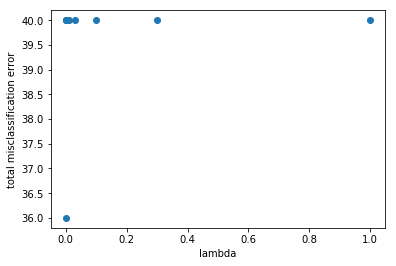

In [72]:
plt.plot(lambdaValues, totalErrorValues, 'o')
plt.xlabel('lambda')
plt.ylabel('total misclassification error')
plt.draw()
plt.show()

In [73]:
#testing
error, predictedClasses, correctPredictionCol = classificationTest(inputTest, expectedOutputTest, Wtest, False)
print(error)

114
buildingWindowsFP misclassification error =  3.9215686274509807
buildingWindowsNFP misclassification error =  16.666666666666657
vehicleWindowsFP misclassification error =  61.53846153846153
containers misclassification error =  77.77777777777777
tableware misclassification error =  100.0
lamp misclassification error =  23.529411764705884
total misclassification error =  24.0
150
24.0


In [74]:
actual = pd.DataFrame(expectedOutputTest)
predictedDF = pd.DataFrame(predictedClasses)
correct = pd.DataFrame(correctPredictionCol)
frames = [predictedDF, actual, correct]
modelTest = pd.concat(frames, axis=1)
modelTest.columns = ["Predicted","Predicted", "Predicted", "Predicted", "Predicted", "Predicted", "Actual", "Actual", "Actual", "Actual", "Actual", "Actual", "Correct"]
modelTest

,Predicted,Predicted,Predicted,Predicted,Predicted,Predicted,Actual,Actual,Actual,Actual,Actual,Actual,Correct
0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,1,1
2,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,1,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1
5,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1
6,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1
7,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0
8,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0
9,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1


In [75]:
actualAsClassNumber = [0]*expectedOutputTest.shape[0]
predictedAsClassNumber = [0]*expectedOutputTest.shape[0]
for i in range(expectedOutputTest.shape[0]):
    actualAsClassNumber[i] = expectedOutputTest[i].tolist().index(1)
    predictedAsClassNumber[i] = predictedClasses[i].tolist().index(1.0)
confusion_matrix(actualAsClassNumber, predictedAsClassNumber)

array([[49,  2,  0,  0,  0,  0],
       [ 8, 45,  0,  0,  0,  1],
       [ 0,  8,  5,  0,  0,  0],
       [ 0,  5,  2,  2,  0,  0],
       [ 0,  3,  0,  0,  0,  3],
       [ 0,  2,  2,  0,  0, 13]])

In [76]:
clf = svm.SVC(kernel='linear', C=1)
expectedOutputSVM = data.loc[:,10]
inputTrain, inputTest, expectedOutputTrain, expectedOutputTest = train_test_split(dataInputs, expectedOutputSVM, train_size = trainPercent/100, random_state=42)
clf.fit(inputTrain, expectedOutputTrain)
accuracy = clf.score(inputTest, expectedOutputTest)
print(accuracy)

0.953333333333


In [77]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier

In [78]:
#SVM One vs all classifier
clf = Pipeline([
    ('clf', OneVsRestClassifier(LinearSVC()))])
model = clf.fit(inputTrain, expectedOutputTrain)
accuracy = clf.score(inputTest, expectedOutputTest)
print(accuracy)
svmPredicted = model.predict(inputTest)
confusion_matrix(expectedOutputTest,svmPredicted)

0.84


array([[51,  0,  0,  0,  0,  0],
       [ 1, 47,  4,  0,  2,  0],
       [ 0,  2, 11,  0,  0,  0],
       [ 0,  4,  1,  0,  2,  2],
       [ 0,  0,  3,  0,  0,  3],
       [ 0,  0,  0,  0,  0, 17]])